In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

##Reading  Dataset

In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
# Read the CSV File Using Pandas read_csv function
df = pd.read_csv("/content/drive/MyDrive/moviesData.csv",index_col=False)
df.head(10)

<ipython-input-6-0233625dd64e>:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/moviesData.csv",index_col=False)


,tmdbId,language,overview,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count,credits,poster_path,backdrop_path,title,genres
0,19995,en,In the 22nd century a paraplegic Marine is dis...,521.164,Dune Entertainment-Lightstorm Entertainment-20...,2009-12-15,237000000.0,2.920357e+09,162.0,7.567,28557.0,Sam Worthington-Zoe Saldaña-Sigourney Weaver-S...,/jRXYjXNq0Cs2TcJjLkki24MLp7u.jpg,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
1,411,en,Siblings Lucy Edmund Susan and Peter step thro...,363.431,Walt Disney Pictures-Walden Media-C.S. Lewis C...,2005-12-07,180000000.0,7.450131e+08,143.0,7.120,9361.0,Georgie Henley-Skandar Keynes-William Moseley-...,/iREd0rNCjYdf5Ar0vfaW32yrkm.jpg,/9iRRfMZbnpgHDdKi2lczGGYZXDo.jpg,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy
2,480530,en,Between personal obligations and training for ...,329.063,Metro-Goldwyn-Mayer-New Line Cinema-Chartoff-W...,2018-11-21,50000000.0,2.142159e+08,130.0,6.990,4667.0,Michael B. Jordan-Sylvester Stallone-Tessa Tho...,/v3QyboWRoA4O9RbcsqH8tJMe8EB.jpg,/xTYGN1b3XkOtODryXTKgdXLtPMz.jpg,Creed II (2018),Drama
3,312221,en,The former World Heavyweight Champion Rocky Ba...,320.743,Metro-Goldwyn-Mayer-New Line Cinema-Chartoff-W...,2015-11-25,37000000.0,1.735676e+08,133.0,7.405,6549.0,Michael B. Jordan-Sylvester Stallone-Tessa Tho...,/1BfTsk5VWuw8FCocAhCyqnRbEzq.jpg,/kODNw6GJNdgldUMEhKPlCw8wQCr.jpg,Creed (2015),Drama
4,111332,en,The Making-of James Cameron's Avatar. It shows...,310.289,Lightstorm Entertainment,2010-02-07,0.0,0.000000e+00,23.0,7.200,40.0,James Cameron-Laz Alonso-Richard Baneham-Chris...,/d9oqcfeCyc3zmMal6eJbfj3gatc.jpg,/uEwGFGtao9YG2JolmdvtHLLVbA9.jpg,Avatar: Creating the World of Pandora (2010),Documentary
5,299536,en,As the Avengers and their allies have continue...,309.280,Marvel Studios,2018-04-25,300000000.0,2.046240e+09,149.0,8.263,26445.0,Robert Downey Jr.-Chris Hemsworth-Mark Ruffalo...,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,Avengers: Infinity War - Part I (2018),Action|Adventure|Sci-Fi
6,324786,en,WWII American Army Medic Desmond T. Doss who s...,269.007,Permut Presentations-Summit Entertainment-Lion...,2016-10-07,40000000.0,1.753024e+08,139.0,8.189,11951.0,Andrew Garfield-Sam Worthington-Vince Vaughn-T...,/jhWbYeUNOA5zAb6ufK6pXQFXqTX.jpg,/rshlQ6LfPRSWFhpGL4s5ZkIPR51.jpg,Hacksaw Ridge (2016),Drama|War
7,672,en,Cars fly trees fight back and a mysterious hou...,231.706,Warner Bros. Pictures-Heyday Films-1492 Pictures,2002-11-13,100000000.0,8.766885e+08,161.0,7.722,19555.0,Daniel Radcliffe-Rupert Grint-Emma Watson-Kenn...,/sdEOH0992YZ0QSxgXNIGLq1ToUi.jpg,/7tbeoSTWW2cWPecjQo9fcdf0Hzv.jpg,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy
8,674,en,When Harry Potter's name emerges from the Gobl...,220.170,Warner Bros. Pictures-Heyday Films-Patalex IV ...,2005-11-16,150000000.0,8.959210e+08,157.0,7.817,18491.0,Daniel Radcliffe-Rupert Grint-Emma Watson-Robb...,/fECBtHlr0RB3foNHDiCBXeg9Bv9.jpg,/8f9dnOtpArDrOMEylpSN9Sc6fuz.jpg,Harry Potter and the Goblet of Fire (2005),Adventure|Fantasy|Thriller|IMAX
9,671,en,Harry Potter has lived under the stairs at his...,215.424,Warner Bros. Pictures-Heyday Films-1492 Pictures,2001-11-16,125000000.0,9.764756e+08,152.0,7.913,24348.0,Daniel Radcliffe-Rupert Grint-Emma Watson-Rich...,/wuMc08IPKEatf9rnMNXvIDxqP4W.jpg,/hziiv14OpD73u9gAak4XDDfBKa2.jpg,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy


In [7]:
#summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60682 entries, 0 to 60681
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdbId                60682 non-null  int64  
 1   language              60682 non-null  object 
 2   overview              60682 non-null  object 
 3   popularity            60682 non-null  float64
 4   production_companies  60682 non-null  object 
 5   release_date          60682 non-null  object 
 6   budget                60682 non-null  float64
 7   revenue               60682 non-null  float64
 8   runtime               60682 non-null  object 
 9   vote_average          60682 non-null  float64
 10  vote_count            60682 non-null  float64
 11  credits               60682 non-null  object 
 12  poster_path           59148 non-null  object 
 13  backdrop_path         49741 non-null  object 
 14  title                 60682 non-null  object 
 15  genres             

In [8]:
print('Number of Rows : ',df.shape[0])
print('Number of Columns : ',df.shape[1])

Number of Rows :  60682
Number of Columns :  16


In [9]:
print("Column Names are : ",df.columns)

Column Names are :  Index(['tmdbId', 'language', 'overview', 'popularity', 'production_companies',
       'release_date', 'budget', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'credits', 'poster_path', 'backdrop_path', 'title',
       'genres'],
      dtype='object')


In [ ]:
print('First four rows of the dataset :')
df.head(4)

First four rows of the dataset :


,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,language,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,en,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,en,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,en,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,en,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015


### Taking random sample

In [ ]:
df.sample(4)

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,language,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
9925,984,0.885391,4000000,35976000,Dirty Harry,Clint Eastwood|Harry Guardino|Reni Santoni|Joh...,http://www.warnerbros.com/dirty-harry/,Don Siegel,Detective Harry Callahan. He doesn't break mur...,ambush|san francisco|detective|ransom|stadium,en,"When a madman dubbed the ""Scorpio Killer"" terr...",102,Action|Crime|Thriller,Warner Bros.|Malpaso Company,12/22/1971,300,7.2,1971
7286,15573,0.265891,3000000,7500000,The Cowboys,John Wayne|Roscoe Lee Browne|Bruce Dern|Collee...,NaN,Mark Rydell,All they wanted was their chance to be men...a...,boy|beef|cattle drive|rancher|cattle,en,When his cattlemen abandon him for the gold fi...,131,Action|Adventure|Drama|Western,Warner Bros.,1/13/1972,30,6.6,1972
6408,9729,0.476555,25000000,0,Where the Truth Lies,Kevin Bacon|Colin Firth|Alison Lohman|David Ha...,NaN,Atom Egoyan,NaN,sex|journalist|journalism|1970s|entertainer,en,An ambitious reporter probes the reasons behin...,107,Drama|Mystery|Thriller,Serendipity Point Films,10/7/2005,29,5.8,2005
5191,33339,0.147375,3000000,1628154,Camp,Daniel Letterle|Joanna Chilcoat|Robin de Jesus...,NaN,Todd Graff,You can't fit in when you already stand out.,gay|summer camp|independent film|coming of age...,fr,"Misfits in their lives back home, a group of y...",114,Comedy|Music,Laughlin Park Pictures|IFC Productions,9/5/2003,12,4.9,2003


>**Observation From The Dataset**
- The dataset contain lots of movies where the budget or revenue have a value of '0' and to clean this we created a new column verdict by merging budget and revenue.
- The format of date is not fixed in 'release_date'.

In [ ]:
#since the dataset contain null values also
#count total rows in each column which contain null values
print("No of rows in each column containing null values are :")
df.isna().sum()

No of rows in each column containing null values are :


id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7927
director                  44
tagline                 2824
keywords                1493
language                   0
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [ ]:
print("Percentage of null values in each column are :")
(df.isnull().sum()/len(df))*100

Percentage of null values in each column are :


id                       0.000000
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699623
homepage                72.972475
director                 0.405045
tagline                 25.996502
keywords                13.743901
language                 0.000000
overview                 0.036822
runtime                  0.000000
genres                   0.211728
production_companies     9.481727
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
dtype: float64

### Data Cleaning (Removing The Unused Information From The Dataset)
> #### Information That We Need To Delete Or Modify
1. We need to remove duplicate rows from the dataset
2. Changing format of release date into datetime format
3. Remove the unused colums that are not needes in the analysis process.
4. Remove the movies which are having zero value of budget and revenue.

**1. Remove Duplicate Rows**

In [ ]:
#'duplicated()' function in pandas return the duplicate row as True and othter as False
#for counting the duplicate elements we sum all the rows
print('No of duplicated Rows present : ',sum(df.duplicated()))

No of duplicated Rows present :  1


In [ ]:
#After calculating the duplicate row we can drop these row using 'drop_duplicates()' function
df.drop_duplicates(inplace = True)
#afetr removing duplicate value from the dataset
print("Afetr Removing Duplicate Values (Rows,Columns) : ",df.shape)

Afetr Removing Duplicate Values (Rows,Columns) :  (10862, 19)


**2. Changing Format Of Release Date Into Datetime Format**

In [ ]:
#the the given in the dataset is in string format.
#So we need to change this in datetime format

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

**3. Remove the unused colums that are not needes in the analysis process**
> We can see that 18 columns in the dataset, We can drop the the colums which are not usable in the data analysis process.
columns like: runtime,homepage.<br>
> The columns like homepage and runtime are not required for our analysis and we will drop these columns.

In [ ]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section
#we can see that 21 columns in the dataset, We can drop them using drop function.
df.drop(['homepage','runtime'],axis =1,inplace = True)
print("After Removing Unused Columns (Rows,Columns) : ",df.shape)

After Removing Unused Columns (Rows,Columns) :  (10862, 17)


**4. Drop theses rows which contain incorrect or inappropriate values.**
> As you can see in this database of movies there are lots of movies where the budget or revenue have a value of '0' which means that the values of those variables of those movies has not been recorded. Calculating the profits of these movies would lead to inappropriate results. I think this may be due to varying factors like the lack of information, or the movies that were never released. I have chosen to eradicate these values during the data cleaning phase.

In [ ]:
# Checking for an zero values in the budget and revenue columns

x=df[(df['budget']==0)].shape[0]
y=df[(df['revenue']==0)].shape[0]

print("Rows With Zero Values In The Budget Column:",x)
print("Rows With Zero Values In The Revenue Column:",y)

a=(x/len(df)*100)
b=(y/len(df)*100)

print('Percentage of zero values in Budget Column are : ',a)
print('Percentage of zero values in Revenue Column are : ',b)

Rows With Zero Values In The Budget Column: 1925
Rows With Zero Values In The Revenue Column: 2969
Percentage of zero values in Budget Column are :  17.722334744982508
Percentage of zero values in Revenue Column are :  27.333824341741852


In [ ]:
index_1 = df[ (df['budget'] == 0) | (df['revenue'] == 0) ].index
df.drop(index_1,inplace=True)

In [ ]:
df.shape

(6728, 17)

### Correlation between budget and revenue

<AxesSubplot:>

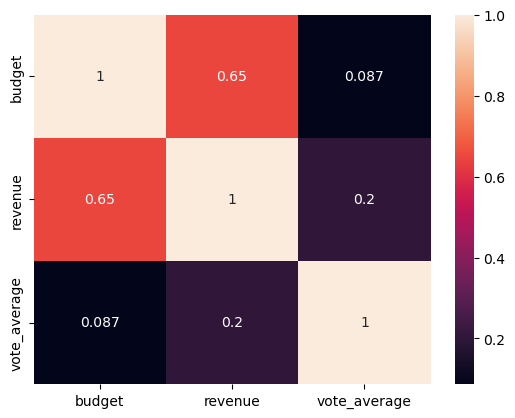

In [ ]:
# Select the relevant columns
import seaborn as sns
subset = df[['budget', 'revenue', 'vote_average']]

# Calculate the correlation matrix
correlation_matrix = subset.corr()

# Print the correlation matrix
sns.heatmap(correlation_matrix,annot=True)

### Creating the verdict column

In [ ]:
rb=(df.revenue/df.budget)*100

filters = [
   (rb>-100)&(rb<=100),
   (rb>100) & (rb<=150),
   (rb>150) & (rb<=200),
    (rb>200)
]
values = ["flop", "average", "hit","super hit"]
df["verdict"] = np.select(filters,values)

## Exploratory Data Analysis




### Correlation between numerical columns of the data

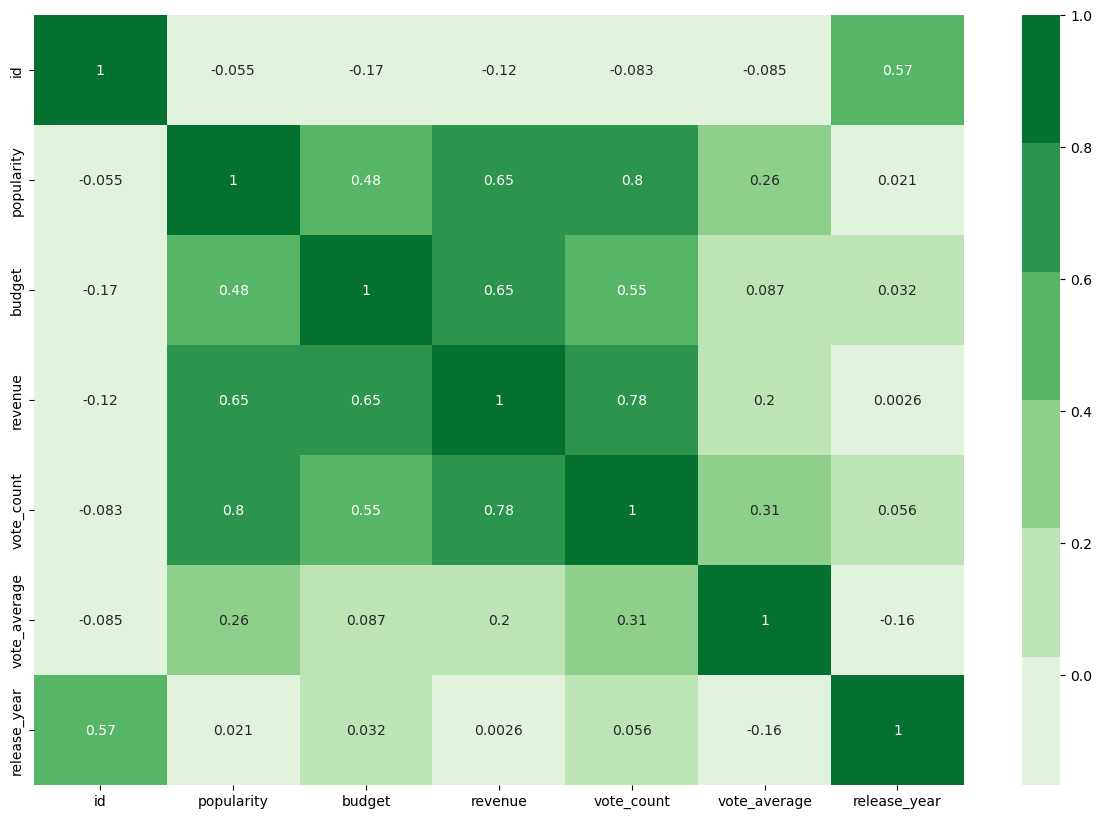

In [ ]:
subset = df
# Calculate the correlation matrix
correlation_matrix = subset.corr()
plt.figure(figsize=(15,10))
colormap = sns.color_palette("Greens")

# creating a heatmap using the colormap
ax = sns.heatmap(correlation_matrix, cmap=colormap,annot=True)

#### After observing the above plot we can conclude that :

>This heatmap demonsrates the correlation between the various parameters such as popularity, budget, revenue etc.
>Here, we observe a strong correlations between popularity and budget and popularity and revenue whcih suggests that
High budget and high grossing movies also known as the Hit movies are more popular than other movies which perform badly at the box office.
>We can also observe a strong correlation between the budget and revenue of movies suggestig that high budget movies have a higher revenue
than low budget movies.
>There is also an obvious correlation between the popularity and vote count which occurs due to more popular movies being
highly watched and thus gaining more amount of votes.



**1: Budget vs Revenue**

The revenues do increase slightly at higher levels but the number of movies with high budgets seem scarce. There is a good possibility that movies with higher investments result in better revenues.
- Correlation = 0.65

We can't find a relationship here. The revenues don't seem to change with higher vote average.

**2: Popularity vs Revenue **

The revenue seems to be increasing with popularity. We can say that if the popularity of movie is high then the revenue of the movie may be high.
- Correlation = 0.65

**3: Vote Average vs Revenue **

The correlation between revenue and vote average is **0.2**. So vote average is not highly related to the revenue.



C:\Users\Priyansh Tyagi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='verdict', ylabel='popularity'>

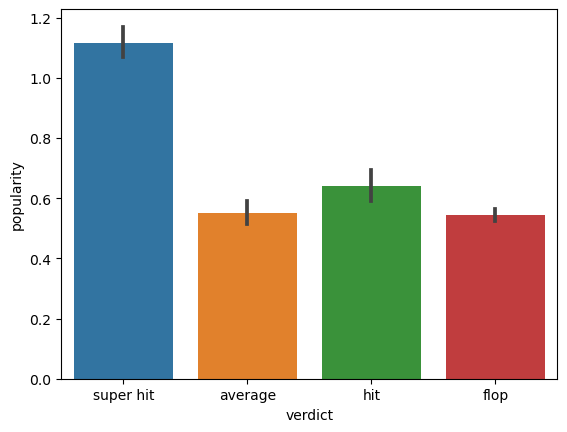

In [ ]:
sns.barplot(df['verdict'],df['popularity'])

### After observing the above graph we can conclude that :

>This graph shows the difference in popularity of different movies based on their performance,
where super-hit and hit movies which performed very well on the box office are much more popular than
the average and flop movies.

<a id='eda'></a>
##



### Research Question 1 : Which year has the highest release of movies?

release_year
2011    278
2012    563
2013    245
2014    625
2015    601
Name: id, dtype: int64


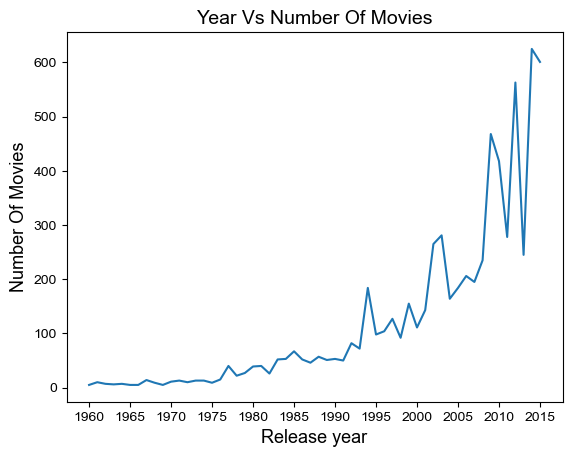

In [ ]:
# make group for each year and count the number of movies in each year
data=df.groupby('release_year').count()['id']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)

#set the style sheet
sns.set_style("whitegrid")

#### After Seeing the plot and the output we can conclude that year 2014 year has the highest release of movies (625) followed by year 2015 (601) and year 2012 (563).

### Research Question 2 : Movie with Highest And Lowest Votes?

In [ ]:
#find the movie with most and least votes.
#use 'find_minmax' function which i made earlier by passsing 'Vote_average' as argument.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])

    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis=1)
find_minmax('vote_average')

Movie Which Has Highest vote_average :  The Mask You Live In
Movie Which Has Lowest vote_average  :  Jurassic Shark


,538,4881
id,224972,120846
popularity,0.114264,0.079281
budget,4000000,3000000
revenue,2400000,4000000
original_title,The Mask You Live In,Jurassic Shark
cast,NaN,Emanuelle Carriere|Christine Emes|Celine Filio...
director,Jennifer Siebel Newsom,Brett Kelly
tagline,"Is american masculinity harming our boys, men ...",Dinosaur from the deep
keywords,feminism|sexism|young boy|gender roles|misogyny,shark attack|teenager|shark
language,en,en


> The first column containt the movie with highest votes and second column contain the movie with lowest votes.<br>
> As we can see that movie **'The Mask You Live In'** has the maximum rating (8.9), which was directed by Mark Cousins and movie with lowest user ratings is **'Jurassic Shark'** with 2.0 user ratings, which was directed by Leigh Scott.

### Research Question 3: Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?

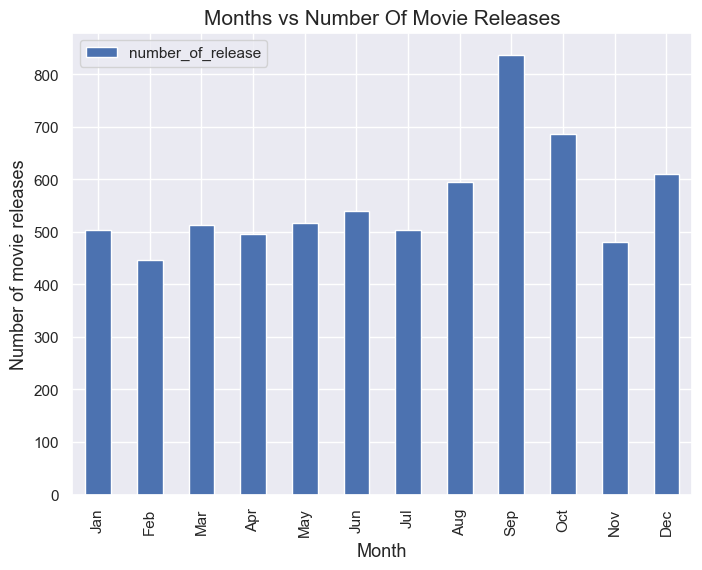

In [ ]:
#extract the month number from the release date.
month_release = df['release_date'].dt.month

#count the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

#plot the bar graph using plot.
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")


>**According to the plot we can conclude that there are higher number of release in september and october month.**

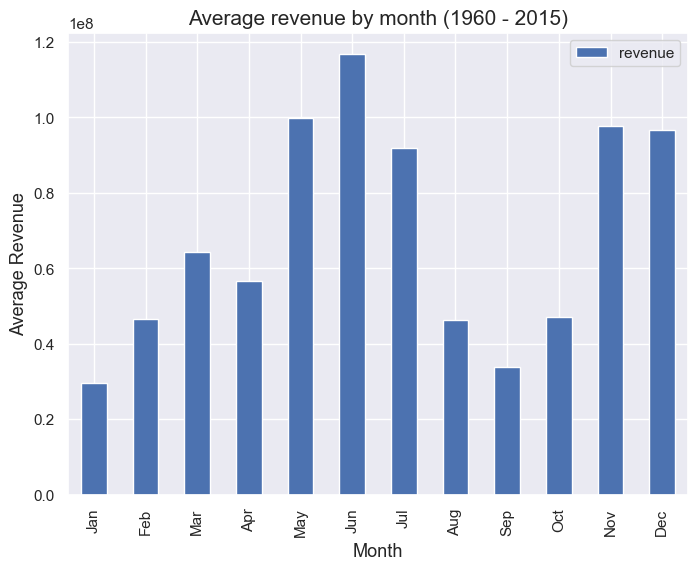

In [ ]:
#which month made the highest average revenue?.
#make a dataframe with in which store the release month of each movie.
month_release = pd.DataFrame(month_release)

#change the column name of the new dataframe 'month_release'.
month_release.rename(columns = {'release_date':'release_month'},inplace=True)

#add a new column 'revenue' in the dataframe 'month_release'.
month_release['revenue'] = df['revenue']

#make the group of the data according to their month and calculate the mean revenue of each month.
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months

#make the bar plot using pandas plot function.
mean_revenue.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

#setup the title and lables of the plot.
plt.title('Average revenue by month (1960 - 2015)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Revenue',fontsize = 13)
sns.set_style("darkgrid")

> **According tp the plot we can say that movie which release in may or june month made the high revenue in comparison of other month release. Or it can be happened because of outliers.**

### Research Question 4:  Which Genre Has The Highest Release Of Movies?

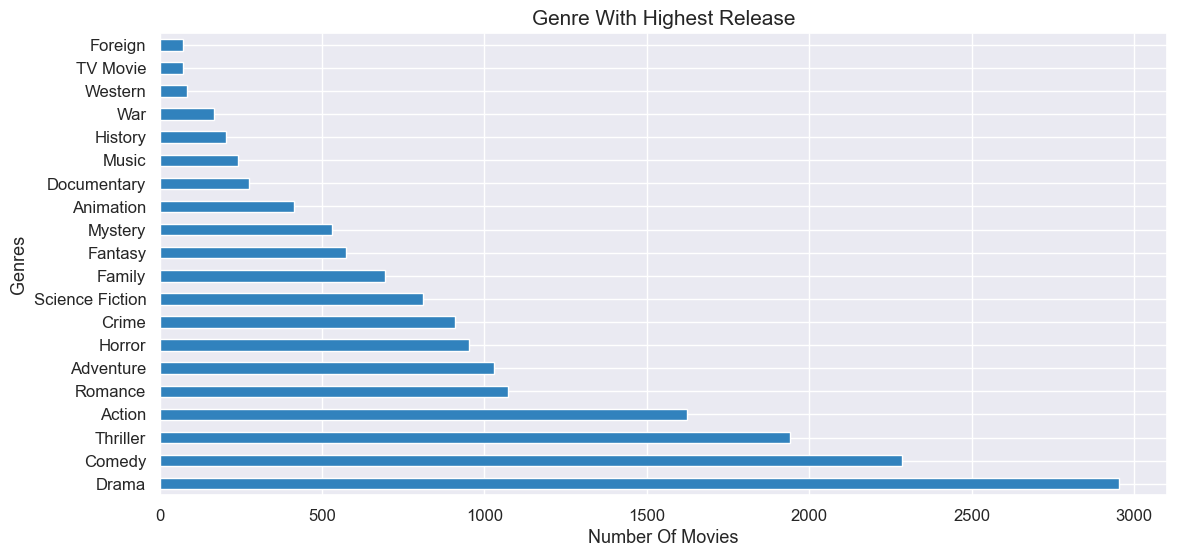

In [ ]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

## > **According to the plot Drama(2973) genre has the highest release of movies followed by Comedy(2260) and Thriller(1970).**

### Reasearch Question 5: Most Frequent Actor?

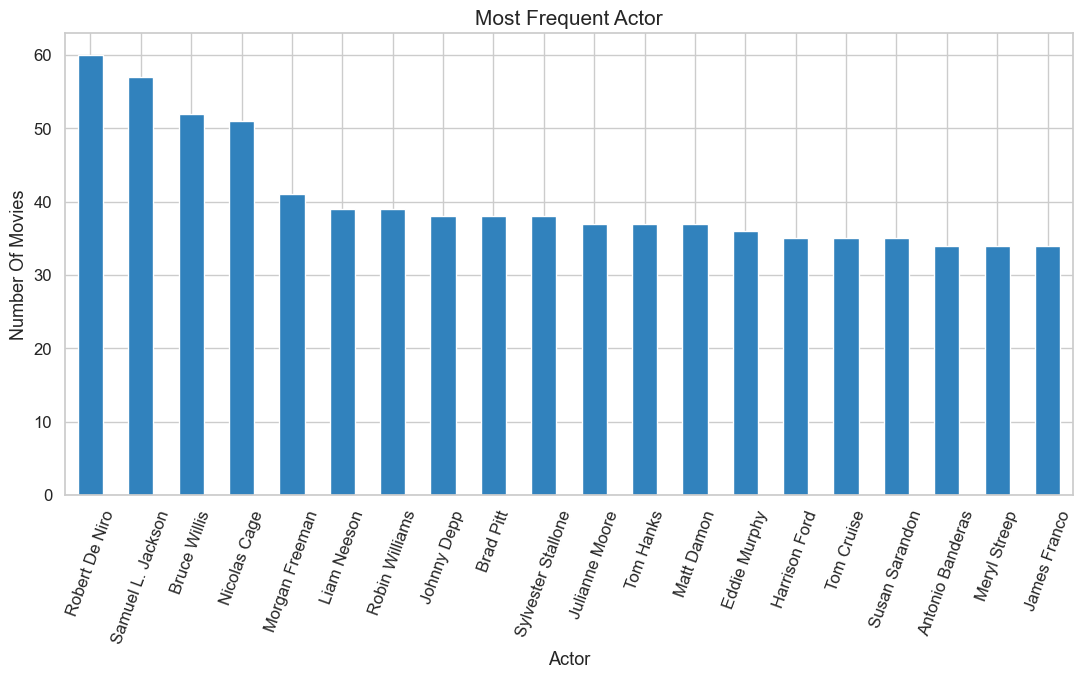

In [ ]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies done by each actor.
count_actor_flims = count_genre('cast')

#plot the barh plot.
count_actor_flims.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

### It's not 100 percent guaranteed solution that this formula is gonna work, But it shows us that we have Robert De Niro as most frequent actor according to plot

### Reasearch Question 6: Top 10 Production Companies With Higher Number Of Release?

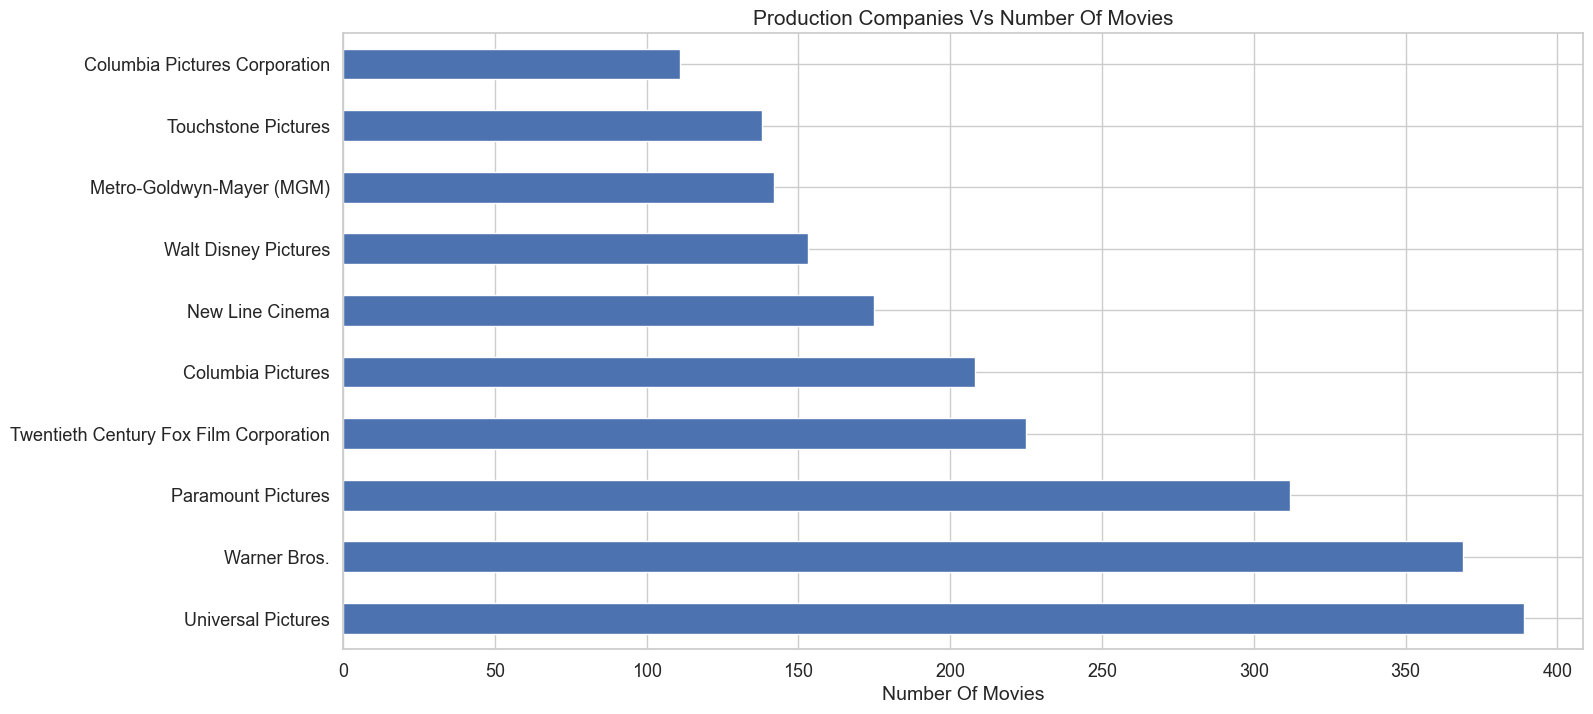

In [ ]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies released by each production company.
production_companies = count_genre('production_companies')

#plot he barh plot.
production_companies.iloc[:10].plot(kind='barh',figsize=(16,8),fontsize=13)
plt.title("Production Companies Vs Number Of Movies",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=14)
sns.set_style("whitegrid")

### These are the top 10 production companies

### Research Question 7 :   Top 10 Director Who Directs Maximum Movies?

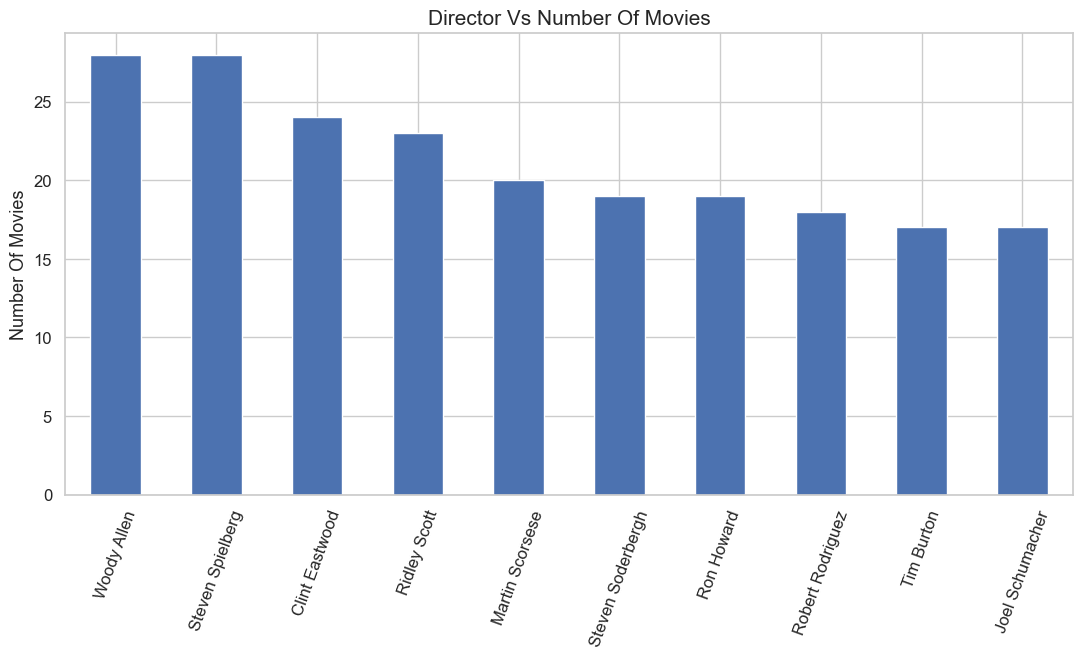

In [ ]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies directed by each diretor.
count_director_movies = count_genre('director')

#plot a barh graph
count_director_movies.iloc[:10].plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels
plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

### These are top 10 directors which have directed maximum no of movies.

<a id='conclusions'></a>
## Conclusions

>
- Drama is the most popular genre, following by action, comedy and thriller.
- Drame, Comedy, Thriller and Action are four most-made genres.
- Maximum Number  Of Movies Release In year 2014.
- May,june,november and december are most popular month for releasing movies, if you want to earn more profit.
- Revenue is directly connected to the budget.
- Warner Bros, Universal Pictures and Paramount Pictures production companies earn more life time profit than other production companies.
- Movies with higher budgets have shown a corresponding increase in the revenues.


>**Limitations**
- It's not 100 percent guaranteed solution that this formula is gonna work, But it shows us that we have high probability of making high profits if we had similar characteristics as such. If we release a movie with these characteristics, it gives people high expectations from this movie. This was just one example of an influantial factor that would lead to different results, there are many that have to be taken care of.
- During the data cleaning process, we split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.